# Exploring Qubits with Qiskit

In [22]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

IBMQ.save_account('8e2b56968a2fa3ecf52b82eb950387ca025456e7306c9fba92d486362e6f292157018ae511d6e64729ffb8c869df45145b2db60970e7befe6d147c4a319551c9')

configrc.store_credentials:WARNING:2021-02-15 22:19:02,896: Credentials already present. Set overwrite=True to overwrite.


In [23]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

In [24]:
initialState = [0, 1] # Define initialState as |1>
qc.initialize(initialState, 0) # Apply the initialisation operation to the 0th qubit
qc.draw()

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

In [25]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
result = execute(qc, backend).result() # Do the simulation, returning the result
outState = result.get_statevector()
print(outState) # Display the output state vector

[0.+0.j 1.+0.j]


### Let's now measure our qubit as we would in a real quantum computer and see the result

In [26]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░ ┌─┐
   q_0: ┤ initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas: 1/═══════════════════════╩═
                               0

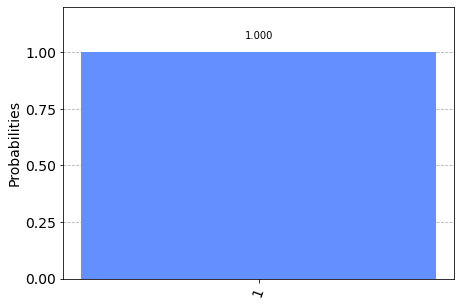

In [27]:
result = execute(qc, backend).result()
counts = result.get_counts()
plot_histogram(counts)

## |q0⟩= 1/√2 |0⟩ + i/√2 |1⟩

In [28]:
initialState = [1/sqrt(2), 1j/sqrt(2)] ## Define state q_0

In [29]:
qc = QuantumCircuit(1)
qc.initialize(initialState, 0)
state = execute(qc, backend).result().get_statevector()
print(state)

[0.70710678+0.j         0.        +0.70710678j]


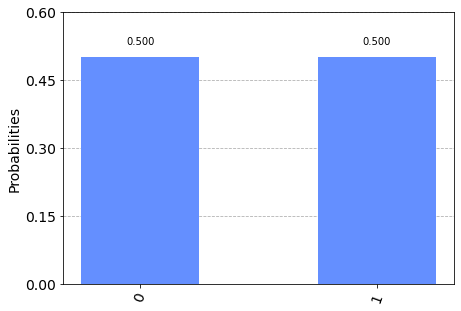

In [30]:
results = execute(qc, backend).result().get_counts()
plot_histogram(results)

### State vector that gives a 1/3 probability of measuring |0>

In [31]:
## State vector that gives a 1/3 probability of measuring |0>
initialState = [1/sqrt(3), sqrt(2)/sqrt(3)]

qc = QuantumCircuit(1)
qc.initialize(initialState, 0)
state = execute(qc, backend).result().get_statevector()
print(state)

[0.57735027+0.j 0.81649658+0.j]


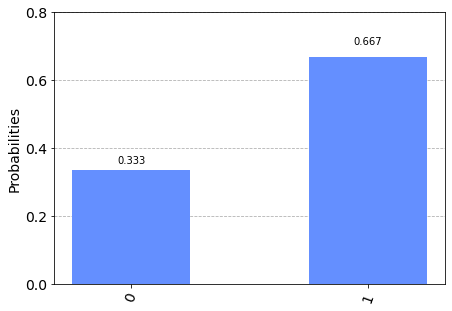

In [32]:
results = execute(qc, backend).result().get_counts()
plot_histogram(results)

### State vector that gives a 1/2 probability of measuring |0>

In [33]:
## State vector that gives a 1/2 probability of measuring |0>
initialState = [1/sqrt(2), 1/sqrt(2)]

qc = QuantumCircuit(1)
qc.initialize(initialState, 0)
state = execute(qc, backend).result().get_statevector()
print(state)

[0.70710678+0.j 0.70710678+0.j]


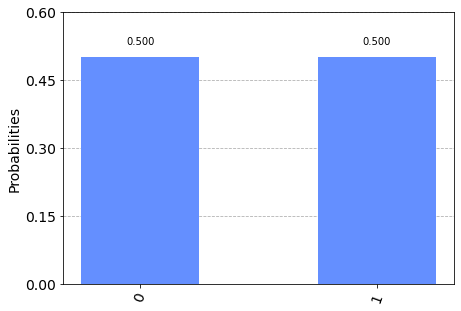

In [34]:
results = execute(qc, backend).result().get_counts()
plot_histogram(results)